In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = [15.0, 10.0]
plt.rcParams['font.size'] = 24

In [4]:
import numpy as np
import sys
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

/Users/jamie/anaconda2/envs/pro/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
def baseline_general(n_features, n_hidden):
    model = Sequential()
    model.add(
             Dense(
                   n_hidden, 
                   input_dim=n_features, 
                   kernel_initializer='normal',
                   activation='sigmoid'
                  )
             )
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [6]:
n_features = 13

In [7]:
neurons = {
    'input_dim': n_features,
    'encoder_hidden': 5,
    'encoded_features': 1,
    'hidden_layer': 50,
    'output_layer': 1
}

my_model = Sequential()
# layer 1
my_model.add(
            Dense(
                 neurons['encoder_hidden'], 
                 input_dim=neurons['input_dim'],
                 kernel_initializer='normal',
                 activation='sigmoid'
                 )
            )
# layer 2
my_model.add(
            Dense(
                 neurons['encoded_features'], 
                 kernel_initializer='normal',
                 activation='sigmoid'
                 )
            )
# layer 3
my_model.add(
            Dense(
                 neurons['hidden_layer'], 
                 kernel_initializer='normal',
                 activation='sigmoid'
                 )
            )
# last layer
my_model.add(Dense(1, kernel_initializer='normal'))
my_model.compile(loss='mean_squared_error', optimizer='adam')

In [8]:
input_file_name = 'boston.csv'

In [9]:
try:
    file_data = np.genfromtxt(input_file_name, delimiter=',', skip_header=1)
except:
    print('Unable to read data file:', input_file_name)
    quit()

data_shape = file_data.shape
n_features = data_shape[1] - 1
n_samples = data_shape[0]

In [10]:
param_dict = {
             'target_column': -1,
             'seed': 42
             }

for run_param in param_dict:
    print(run_param, '\b:', param_dict[run_param])

target_column : -1
seed : 42


In [11]:
try:
    y = file_data[:, param_dict['target_column']]
except IndexError:
    print(param_dict['target_column'], 'is not a valid column.')
    quit()

mask = (file_data == file_data)
mask[:, param_dict['target_column']] = False

x = file_data[mask].reshape((n_samples, n_features))

In [12]:
hidden_layer_n = 500
EPOCHS = 1000

In [13]:
np.random.seed(param_dict['seed'])
baseline_model = baseline_general(n_features, hidden_layer_n)

In [14]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')

In [15]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

In [16]:
#history = baseline_model.fit(
history = my_model.fit(
                            x, y, epochs=EPOCHS,
                            validation_split=0.2, 
                            verbose=0,
                            callbacks=[early_stop, PrintDot()]
                            )


....................................................................................................
..............................

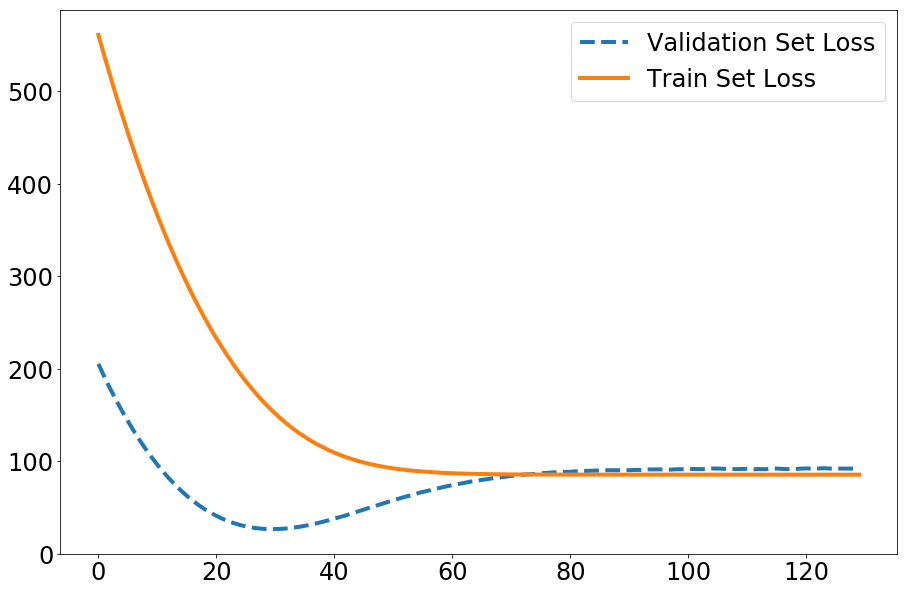

In [17]:
plt.plot(
        history.epoch, history.history['val_loss'],
        label = 'Validation Set Loss',
        lw = 4,
        ls = '--'
        )
plt.plot(
        history.epoch,
        history.history['loss'], 
        label = 'Train Set Loss',
        lw = 4
        )

plt.legend()

In [19]:
my_model.save_weights('my_model_weights.h5')